### Tumor Response to Drug Treatment

* Capomulin and Ramicane are effective in reducing tumor volume (-19% and -22%);
* Capomulin, Ramicane, Stelasyn and Infubinol show a reduction in metastatic sites compared with placebo;
* However, Stelasyn and Infubinol do not impact survival rates while Capomulin and Ramicane do;
----

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import itertools

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_group = combined_data_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
mean_volume_gb_drug_time = drug_time_group['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
mean_volume_gb_drug_time.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume_gb_drug_time = drug_time_group['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
sem_volume_gb_drug_time.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_volume_matrix = mean_volume_gb_drug_time.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
sem_volume_matrix = sem_volume_gb_drug_time.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_volume_matrix.head()
#sem_volume_matrix.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

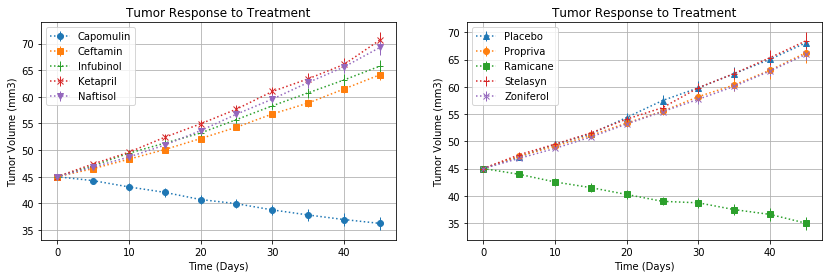

In [5]:
# Generate the Plot (with Error Bars)
fig, axes = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = axes

# get a new marker for each line in the plot
marker_cycler = itertools.cycle(('os+xv^'))

for col in mean_volume_matrix.columns[0:5]:
    ax1.errorbar(mean_volume_matrix.index, mean_volume_matrix[col], yerr= sem_volume_matrix[col], fmt=':', 
                 marker=next(marker_cycler), markersize=6, elinewidth=1)

for col in mean_volume_matrix.columns[5:]:
    ax2.errorbar(mean_volume_matrix.index, mean_volume_matrix[col], yerr= sem_volume_matrix[col], fmt=':', 
                 marker=next(marker_cycler), markersize=6, elinewidth=1)

ax1.grid()
ax1.set_title('Tumor Response to Treatment')
ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.legend()

ax2.grid()
ax2.set_title('Tumor Response to Treatment')
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.legend()

# Save the Figure
plt.savefig('plot1.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_metsite_gb_drug_time = drug_time_group['Metastatic Sites'].mean().reset_index()

# Preview DataFrame
mean_metsite_gb_drug_time.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
sem_metsite_gb_drug_time = drug_time_group['Metastatic Sites'].sem().reset_index()

# Preview DataFrame
sem_metsite_gb_drug_time.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.074833
2  Capomulin         10          0.125433
3  Capomulin         15          0.132048
4  Capomulin         20          0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
mean_metsite_matrix = mean_metsite_gb_drug_time.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
sem_metsite_matrix = sem_metsite_gb_drug_time.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mean_metsite_matrix.head()
#sem_metsite_matrix.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

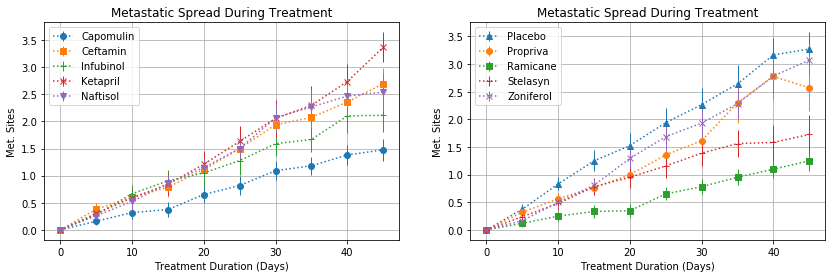

In [9]:
# Generate the Plot (with Error Bars)
fig, axes = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = axes

marker_cycler = itertools.cycle(('os+xv^'))

for col in mean_metsite_matrix.columns[0:5]:
    ax1.errorbar(mean_metsite_matrix.index, mean_metsite_matrix[col], yerr= sem_metsite_matrix[col], fmt=':', 
                 marker=next(marker_cycler), markersize=6, elinewidth=1)

for col in mean_metsite_matrix.columns[5:]:
    ax2.errorbar(mean_metsite_matrix.index, mean_metsite_matrix[col], yerr= sem_metsite_matrix[col], fmt=':', 
                 marker=next(marker_cycler), markersize=6, elinewidth=1)

ax1.grid()
ax1.set_title('Metastatic Spread During Treatment')
ax1.set_xlabel('Treatment Duration (Days)')
ax1.set_ylabel('Met. Sites')
ax1.legend()

ax2.grid()
ax2.set_title('Metastatic Spread During Treatment')
ax2.set_xlabel('Treatment Duration (Days)')
ax2.set_ylabel('Met. Sites')
ax2.legend()

# Save the Figure
plt.savefig('plot2.png')

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount_gb_drug_time = drug_time_group['Mouse ID'].count().reset_index()

# Preview DataFrame
mousecount_gb_drug_time.head()

Drug  Timepoint  Mouse ID
0  Capomulin          0        25
1  Capomulin          5        25
2  Capomulin         10        25
3  Capomulin         15        24
4  Capomulin         20        23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mousecount_matrix = mousecount_gb_drug_time.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
mousecount_matrix.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

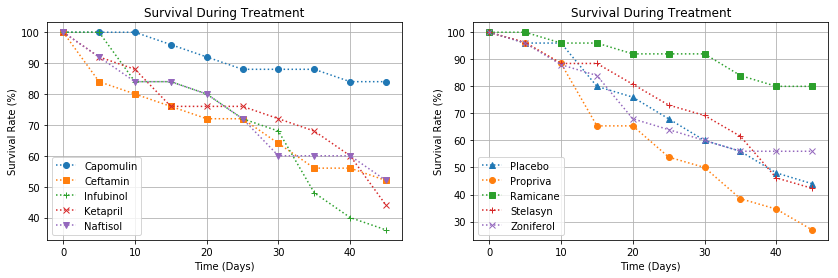

In [12]:
# Generate the Plot (Accounting for percentages)
mousepct_matrix = pd.DataFrame()
for col in mousecount_matrix.columns:
    mousepct_matrix[col] = 100.0 * mousecount_matrix[col] / mousecount_matrix.loc[0,col]

fig, axes = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = axes

marker_cycler = itertools.cycle(('os+xv^'))

for col in mousepct_matrix.columns[0:5]:
    ax1.plot(mousepct_matrix.index, mousepct_matrix[col], ':', marker=next(marker_cycler), markersize=6)

for col in mousepct_matrix.columns[5:]:
    ax2.plot(mousepct_matrix.index, mousepct_matrix[col], ':', marker=next(marker_cycler), markersize=6)

ax1.grid()
ax1.set_title('Survival During Treatment')
ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Survival Rate (%)')
ax1.legend()

ax2.grid()
ax2.set_title('Survival During Treatment')
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('Survival Rate (%)')
ax2.legend()

# Save the Figure
plt.savefig('plot3.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
volumepct_change = pd.Series()
for col_idx, col in enumerate(mean_volume_matrix.columns):
    initial_vol = mean_volume_matrix.iloc[0,col_idx]
    final_vol = mean_volume_matrix.iloc[-1,col_idx]
    volumepct_change[col] = 100.0 * (final_vol - initial_vol) / initial_vol


# Display the data to confirm
volumepct_change

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

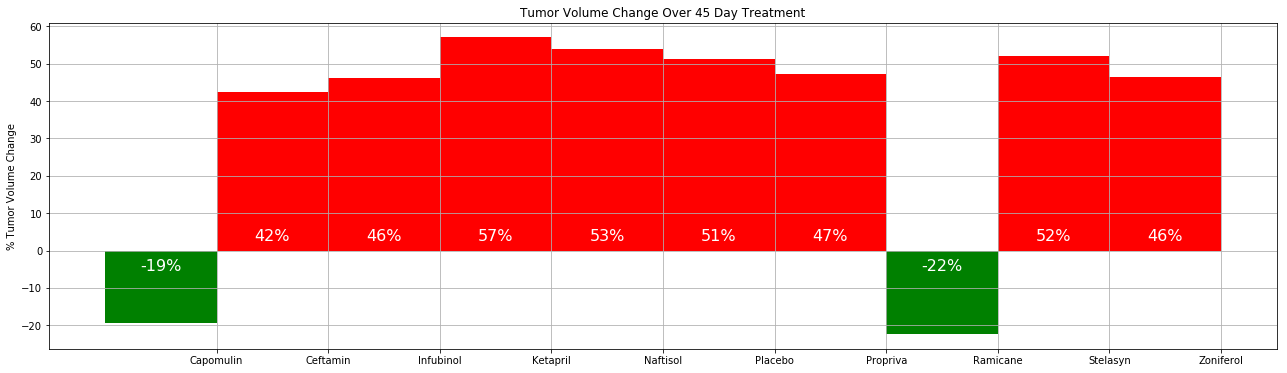

In [14]:
def autolabel(rects):
    """
    Attach label to each bar displaying its height
    Adapted from https://matplotlib.org/examples/api/barchart_demo.html
    """
    for rect in rects:
        height = rect.get_height()
        y = 2 if height >=0 else -6
        plt.text(rect.get_x() + rect.get_width()/2., y ,
                '%d%%' % int(height),
                ha='center', va='bottom', color='w', fontsize=16)


plt.figure(figsize=(22,6))
x_axis = np.arange(len(volumepct_change))
colors = [ 'red' if x >=0 else 'green' for x in volumepct_change ]
rects = plt.bar(x_axis, volumepct_change, width=-1.0, color=colors, align='edge',tick_label=volumepct_change.index)

autolabel(rects)

plt.title('Tumor Volume Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.grid()
plt.savefig('plot4.png')
plt.show()

